<a href="https://colab.research.google.com/github/SauKno/Final_Project_Sales_Projection/blob/Trial/Classification_Cmp_Cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
ifood_db = pd.read_csv('/customer_data.csv')
ifood_db.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [131]:
#importing all the required libraries
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing

pd.set_option('max_columns', 50)

np.random.seed(42)
from datetime import date, datetime, timedelta
%matplotlib inline

In [132]:
# Convert birth year to age
ifood_db1['Age'] = date.today().year - ifood_db['Year_Birth']


In [133]:
# Marital -> multiples using Dummy Variables
ifood_db1.loc[ifood_db['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
dummy_mari_var_aux = pd.get_dummies(ifood_db['Marital_Status'], prefix='marital')
ifood_db2 = pd.concat([ifood_db1,dummy_mari_var_aux],axis=1)

In [134]:
# Replace Educational to an ordinal number
dummy_edu_var_aux = pd.get_dummies(ifood_db1['Education'], prefix='education')
ifood_db3 = pd.concat([ifood_db2, dummy_edu_var_aux], axis=1)

In [135]:
# Make a new column that indicates the campaign number that impacted the scholar
ifood_db3['AcceptedCmpOverall'] = ifood_db3['AcceptedCmp3']+ifood_db3['AcceptedCmp2']+ifood_db3['AcceptedCmp4']+ifood_db3['AcceptedCmp5']+ifood_db3['Response']

In [136]:
# Drop unused columns
ifood_db3.drop(columns=['Marital_Status','Education','Year_Birth',"AcceptedCmp3", "AcceptedCmp2", "AcceptedCmp4", "AcceptedCmp1", "AcceptedCmp5", "Response", "ID"], inplace=True)


In [141]:
ifood_db_cmp = ifood_db3.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue' ])

In [142]:
ifood_db_cmp.head(10)

,Income,Kidhome,Teenhome,Dt_Customer,Recency,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,marital_Absurd,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,marital_YOLO,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,AcceptedCmpOverall
0,58138.0,0,0,9/4/12,58,65,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,46344.0,1,1,3/8/14,38,68,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,8/21/13,26,57,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,26646.0,1,0,2/10/14,26,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,58293.0,1,0,1/19/14,94,41,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,62513.0,0,1,9/9/13,16,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,55635.0,0,1,11/13/12,34,51,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7,33454.0,1,0,5/8/13,32,37,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,30351.0,1,0,6/6/13,19,48,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
9,5648.0,1,1,3/13/14,68,72,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


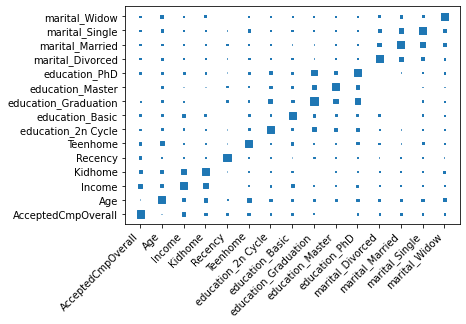

In [143]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    

    size_scale = 50
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale, 
        marker='s' 
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = ifood_db_cmp
columns = ['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Age', 'marital_Divorced', 'marital_Single', 'marital_Married', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'AcceptedCmpOverall']
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)



In [144]:
ifood_db_cmp_corr = (ifood_db_cmp[['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Age', 'marital_Divorced', 'marital_Single', 'marital_Married', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].corrwith(ifood_db_cmp['AcceptedCmpOverall']))

print(ifood_db_cmp_corr)

Income                  0.248654
Kidhome                -0.171288
Teenhome               -0.141447
Recency                -0.098176
Age                    -0.011661
marital_Divorced        0.029432
marital_Divorced        0.029432
marital_Single          0.045195
marital_Single          0.042103
marital_Married        -0.040569
marital_Married        -0.040569
marital_Widow           0.040506
marital_Widow           0.040506
education_2n Cycle     -0.038263
education_Basic        -0.048572
education_Graduation   -0.021395
education_Master        0.000700
education_PhD           0.070046
dtype: float64


In [160]:
ifood_db_cmp['AcceptedCmpOverall'].unique


<bound method Series.unique of 0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    1
Name: AcceptedCmpOverall, Length: 2240, dtype: int64>

In [146]:
cmp1 = np.unique(ifood_db['AcceptedCmp1'], return_counts=True)
cmp2 = np.unique(ifood_db['AcceptedCmp2'], return_counts=True)
cmp3 =np.unique(ifood_db['AcceptedCmp3'], return_counts=True)
cmp4 = np.unique(ifood_db['AcceptedCmp4'], return_counts=True)
cmp5 = np.unique(ifood_db['AcceptedCmp5'], return_counts=True)
cmp6 = np.unique(ifood_db['Response'], return_counts=True)

print(cmp1, cmp2, cmp3, cmp4, cmp5, cmp6)

(array([0, 1]), array([2096,  144])) (array([0, 1]), array([2210,   30])) (array([0, 1]), array([2077,  163])) (array([0, 1]), array([2073,  167])) (array([0, 1]), array([2077,  163])) (array([0, 1]), array([1906,  334]))


In [147]:
ifood_db2.drop(columns=['Marital_Status','Education','Year_Birth', 'ID','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue'], inplace=True)
ifood_db2

,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,marital_Absurd,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,marital_YOLO
0,58138.0,0,0,9/4/12,58,0,0,0,0,0,1,65,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,3/8/14,38,0,0,0,0,0,0,68,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,8/21/13,26,0,0,0,0,0,0,57,0,0,0,1,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,2/10/14,26,0,0,0,0,0,0,38,0,0,0,1,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,1/19/14,94,0,0,0,0,0,0,41,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,6/13/13,46,0,0,0,0,0,0,55,0,1,0,0,0,0,0,0,1,0,0,0,0
2236,64014.0,2,1,6/10/14,56,0,0,0,1,0,0,76,0,0,0,1,0,0,0,0,0,0,1,0,0
2237,56981.0,0,0,1/25/14,91,0,1,0,0,0,0,41,1,0,0,0,0,0,0,1,0,0,0,0,0
2238,69245.0,0,1,1/24/14,8,0,0,0,0,0,0,66,0,0,0,1,0,0,0,0,0,0,1,0,0
